In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [2]:
#plt.style.use('seaborn-pastel')
plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')

In [3]:
def choose_best_tresh(data_syn) -> pd.DataFrame:
    
    best_mean = 0
    df_best = None
    treshoulds = data_syn.THRE.unique()
    
    for tresh in treshoulds:
        
        df_tresh = data_syn[data_syn['THRE'] == tresh]
        
        mean_f1 = df_tresh.F1.mean()
        
        if mean_f1 > best_mean:
            best_mean = mean_f1
            df_best = df_tresh
            
    print(f'Best F1: {best_mean} - best Tresh: {df_best.THRE.unique()}')
            
    return df_best

In [4]:
def plot_roc_curve_from_df(df, name):
    
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(10,7))

    list_models = df['model_name'].unique()
    
    for nmodel in ['RandomForest', 'DecisionTree', 'KNN', 'Xgboost', 'SynClass']:

        df_filter = df[df.model_name == nmodel]
        tprs = []
        aucs = []

        for index, row in df_filter.iterrows():
            x = row['FPR'].replace('\n', '')
            y = row['TPR'].replace('\n', '')

            x = x.replace('[', '')
            y = y.replace('[', '')

            x = x.replace(']', '')
            y = y.replace(']', '')

            x = np.fromstring(x, dtype=float, sep=' ')
            y = np.fromstring(y, dtype=float, sep=' ')

            interp_tpr = np.interp(mean_fpr, x, y)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(row['AUC'])

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)

        name_color = model_to_color(nmodel)
        
        ax.plot(
            mean_fpr,
            mean_tpr,
            '--',
            label=r"Mean ROC (%0.25s AUC = %0.2f $\pm$ %0.2f)" % (nmodel, mean_auc, std_auc),
            lw=3,
            alpha=0.8,
            color=name_color
        )


    ax.plot([0, 1], [0, 1], linestyle="-", lw=3, color="r", alpha=0.8)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.legend()
    ax.legend(loc="lower right", fontsize=14)
    # cemter left
    #ax.legend(loc='center', bbox_to_anchor=(1, 0.5))
    # 
    #ax.legend(bbox_to_anchor =(0.65, 1.25))

    plt.savefig(name + '_roc.svg', dpi=300)
    plt.show()

In [5]:
def model_to_color_v2(argument):
    '''
    match argument:
        case 'RandomForest':
            return '#F39189'
        case 'DecisionTree':
            return '#9A86A4'
        case 'KNN':
            return '#E2C2B9'
        case 'Xgboost':
            return '#555555'
        case 'SynClass':
            return '#A1CAE2'
        case default:
            return ''
    '''

In [12]:
def model_to_color(argument):

        if argument == 'RandomForest':
            return '#F39189'
        if argument == 'DecisionTree':
            return '#9A86A4'
        if argument == 'KNN':
            return '#E2C2B9'
        if argument == 'Xgboost':
            return '#555555'
        if argument == 'SynClass':
            return '#A1CAE2'
        else:
            return ''

In [13]:
path_results = '../results/all-results/'
path_results_synclass = '../results/results-synclass-dt/'
path_plots = 'plots_bar_roc/'

## A_thrombosis_non_thrombosis_v5

Best F1: 0.6283369438208148 - best Tresh: [0.05]


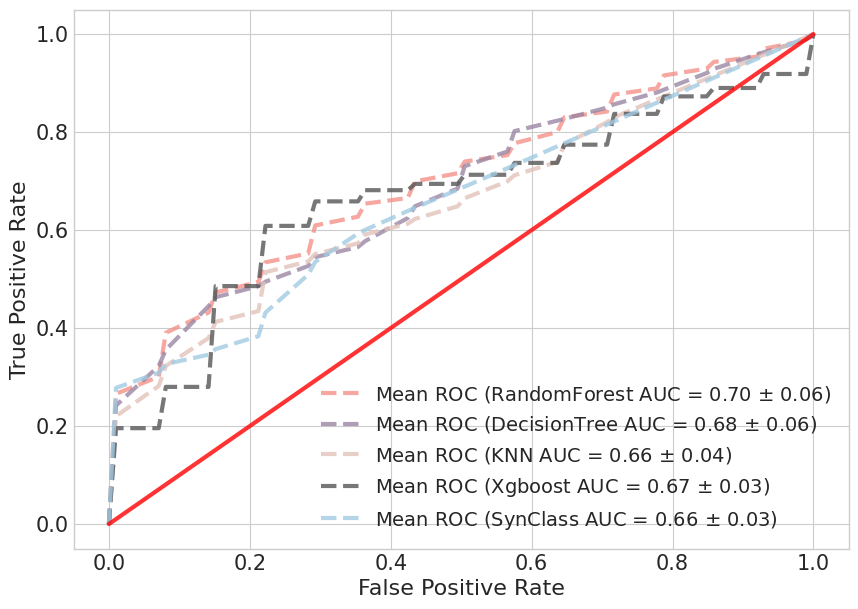

In [15]:

dset = 'A_thrombosis_non_thrombosis_v5'
test_size = 0.1

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')

df_model = choose_best_tresh(dataf_synclass)

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])

plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.697960287504322 - best Tresh: [0.17]


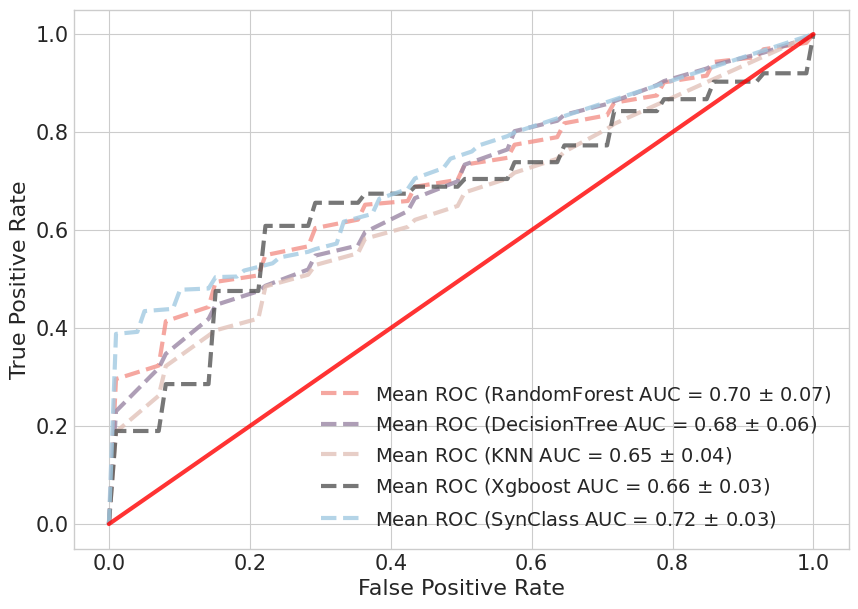

In [16]:

dset = 'A_thrombosis_non_thrombosis_v5'
test_size = 0.15

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')

df_model = choose_best_tresh(dataf_synclass)

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])

plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.710312716476662 - best Tresh: [0.17]


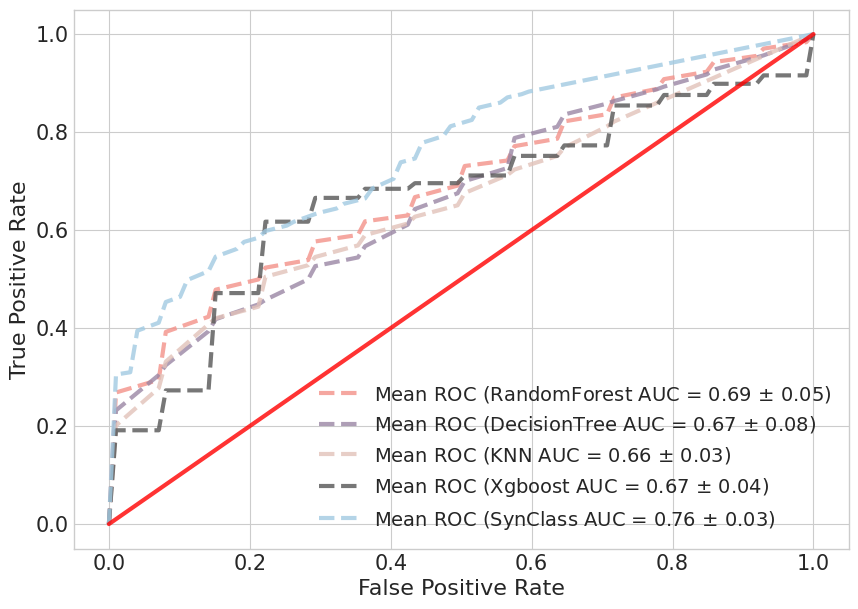

In [17]:

dset = 'A_thrombosis_non_thrombosis_v5'
test_size = 0.2

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')

df_model = choose_best_tresh(dataf_synclass)

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])

plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

In [18]:
dset = 'A_thrombosis_non_thrombosis_v5'
test_size = 0.25

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')

df_model = choose_best_tresh(dataf_synclass)

Best F1: 0.6534763299910732 - best Tresh: [0.05]


## B_type_I_PE_vs_Type_II_v4

Best F1: 0.6575714285714284 - best Tresh: [0.31]


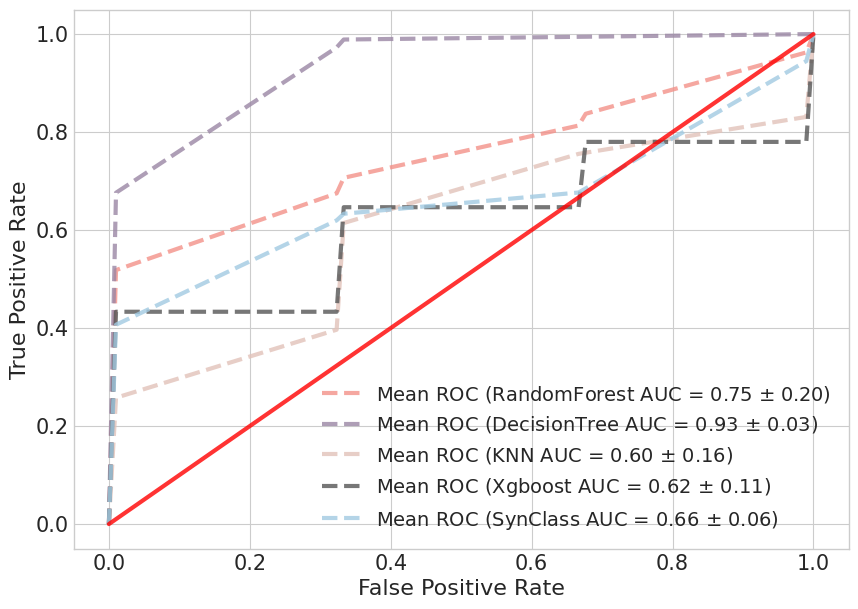

In [21]:
dset = 'B_type_I_PE_vs_Type_II_v4'

test_size = 0.10

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')

df_model = choose_best_tresh(dataf_synclass)

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])

plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.7598412698412699 - best Tresh: [0.11]


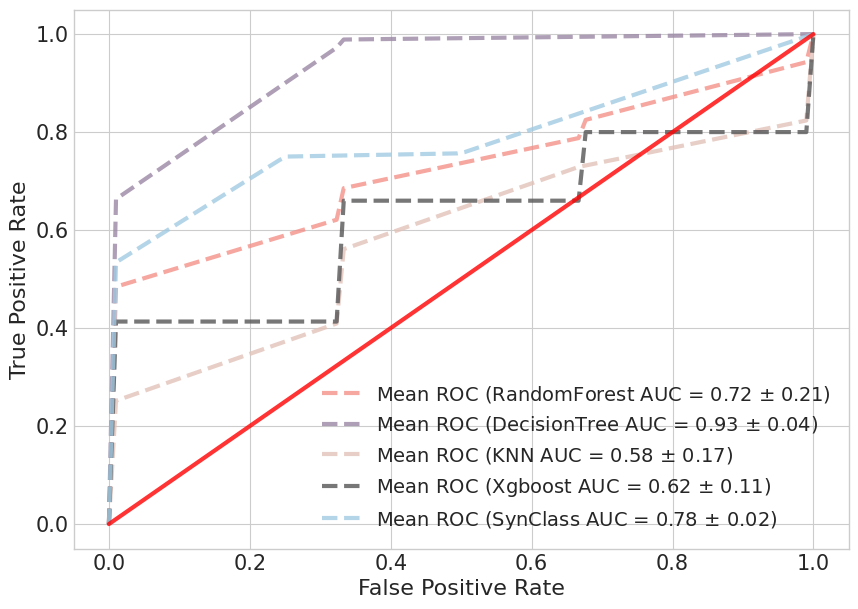

In [22]:
dset = 'B_type_I_PE_vs_Type_II_v4'
test_size = 0.15
dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')

df_model = choose_best_tresh(dataf_synclass)

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])

plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.789772727272727 - best Tresh: [0.11]


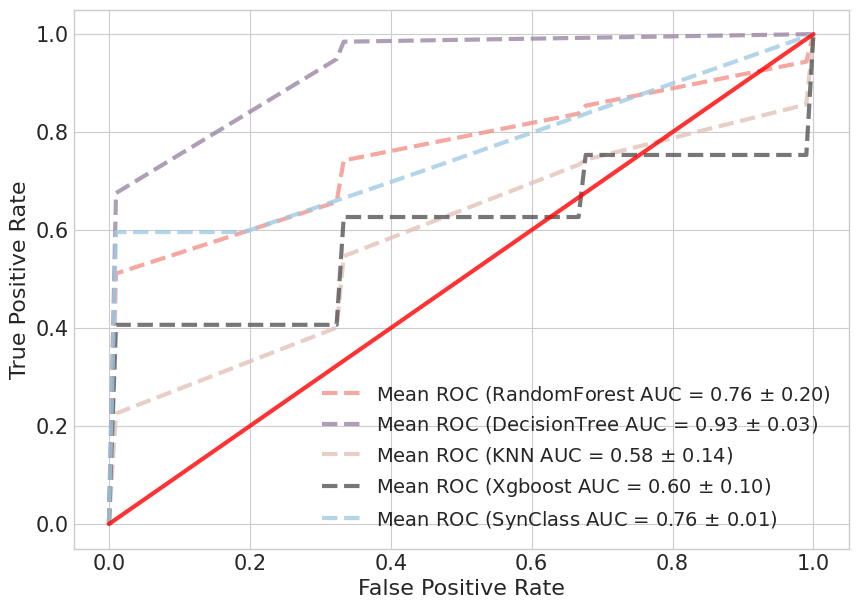

In [23]:
dset = 'B_type_I_PE_vs_Type_II_v4'
test_size = 0.2
dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')

df_model = choose_best_tresh(dataf_synclass)

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])

plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

## C_type_I_vs_Type_II_no_PE_v4

Best F1: 0.6752380952380951 - best Tresh: [0.1]


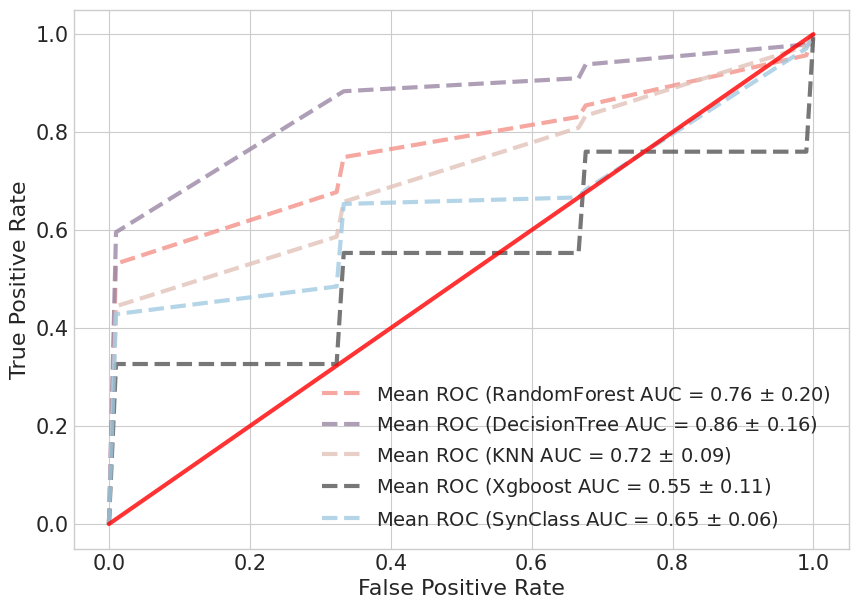

In [24]:
dset = 'C_type_I_vs_Type_II_no_PE_v4'
test_size = 0.1

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)
dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])
plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.7647619047619049 - best Tresh: [0.11]


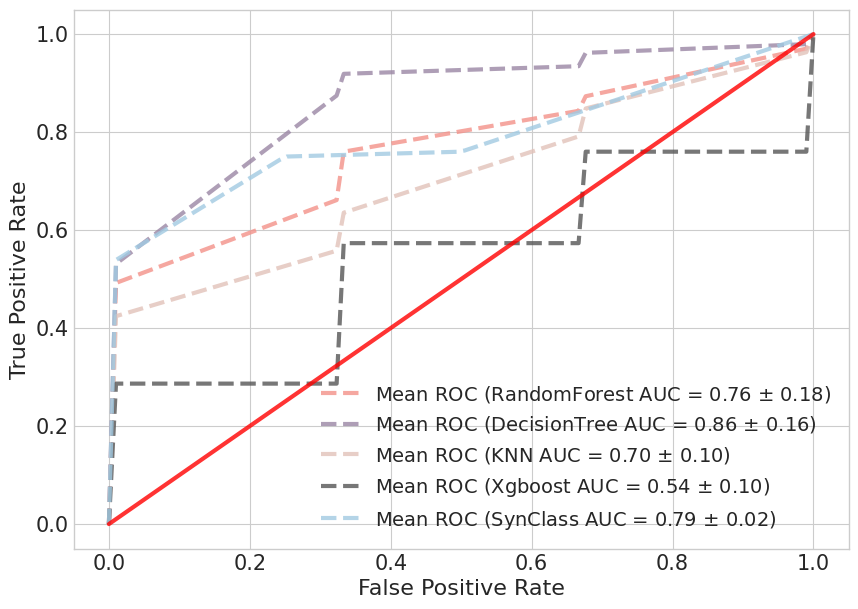

In [25]:
dset = 'C_type_I_vs_Type_II_no_PE_v4'
test_size = 0.15

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)
dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])
plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.8948636363636363 - best Tresh: [0.11]


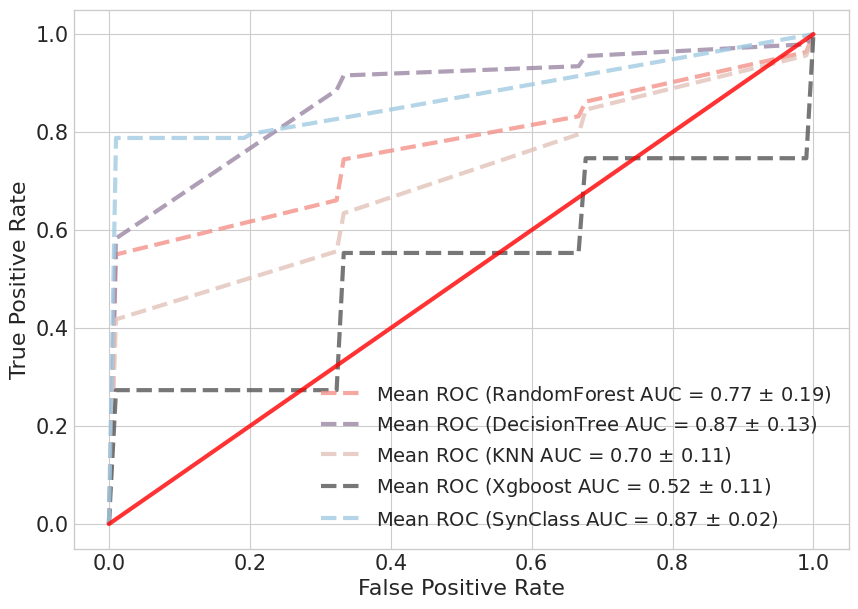

In [26]:
dset = 'C_type_I_vs_Type_II_no_PE_v4'
test_size = 0.2

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)
dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])
plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

## D_type_I_vs_type_II_v4

Best F1: 0.6982857142857144 - best Tresh: [0.31]


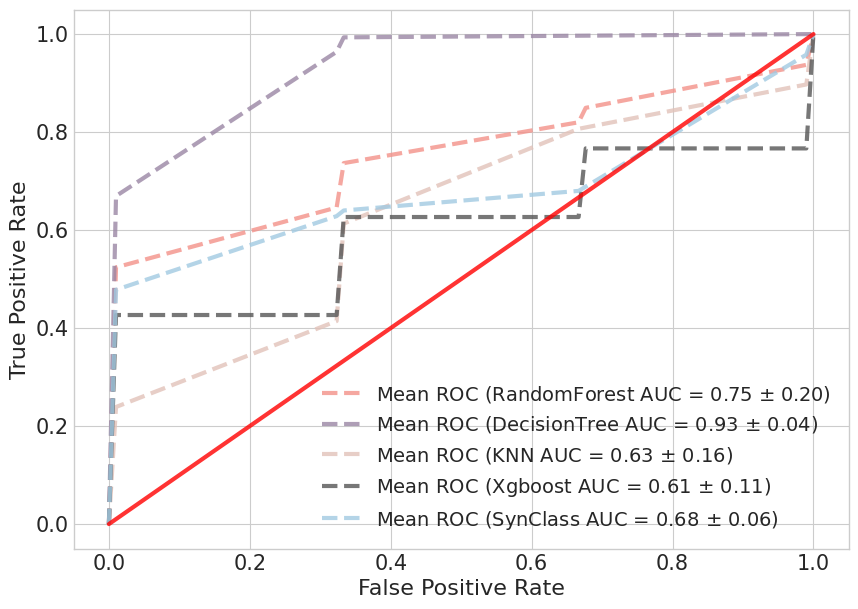

In [27]:
dset = 'D_type_I_vs_type_II_v4_roc'
test_size = 0.1

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)
dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])
plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.7573809523809524 - best Tresh: [0.11]


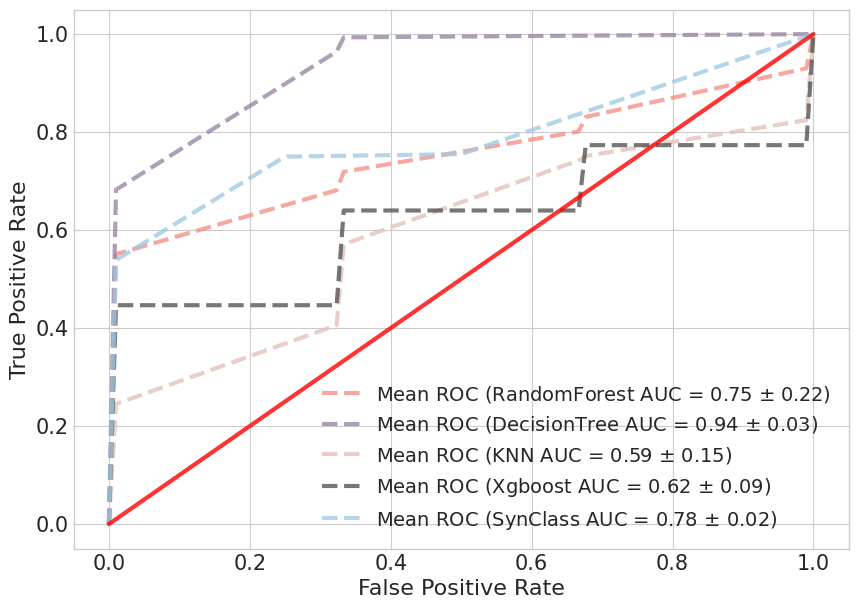

In [28]:
dset = 'D_type_I_vs_type_II_v4_roc'
test_size = 0.15

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)
dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])
plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.7916666666666664 - best Tresh: [0.11]


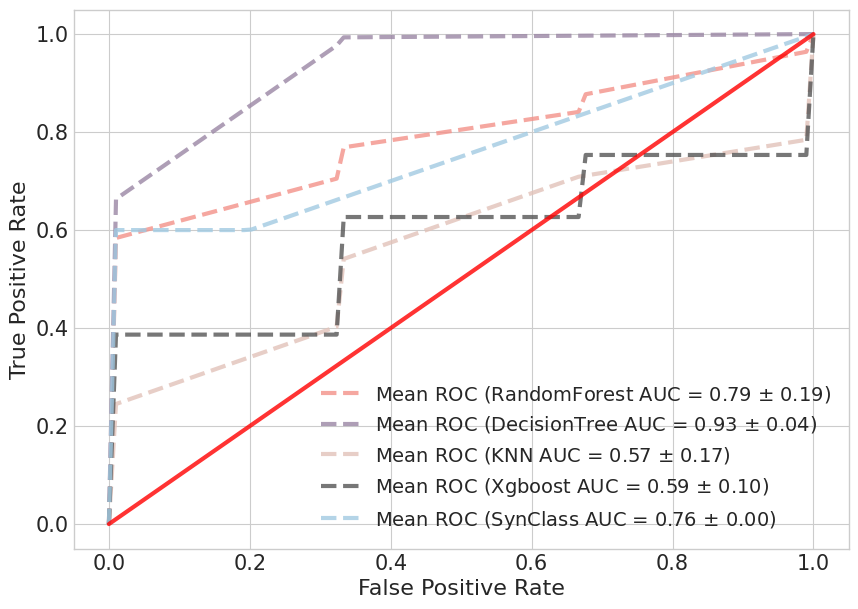

In [29]:
dset = 'D_type_I_vs_type_II_v4_roc'
test_size = 0.2

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)
dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')
dataf_concat = pd.concat([df_model, dataf])
plot_roc_curve_from_df(dataf_concat, f'{path_plots}{dset}_{test_size}')